In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.utils.vis_utils import plot_model
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid']=False

In [3]:
df = pd.read_csv('/content/avg_year_resampled.csv', delimiter=',')
df1= pd.read_csv('/content/extreme_summer.csv', delimiter=',')
df

,Time,sum_Qdot_HIL3,sum_Qdot_HIL2,sum_Qdot_HIL1,T_out_Boiler,Qdot_Storage_out,Qdot_boiler,Sum_Qdot_h_total,T_ret,T_sup,...,Relative_Humidity,Solar_Radiation_beam_normal,Solar_Radiation_diffuse_horizontal,Solar_Radiation_diffuse_surface,Solar_Radiation_direct_surface,Station_Pressure,Temperature_Sky_Radiation,Wind_Direction,Wind_Speed,Zenith_Angle
0,0,29144.26045,29101.32217,114959.0624,100.000000,0.0000,91516.11678,173204.6450,100.000000,100.000000,...,98.000000,0.0,0.0,0.0,0.0,98970.0,-15.000000,180.0,2.100000,150.960000
1,600,29144.31318,29101.36058,114959.1677,110.246194,161319.2682,88803.67278,173204.8415,76.764398,102.624980,...,98.000000,0.0,0.0,0.0,0.0,98970.0,-15.000000,180.0,2.100000,150.960000
2,1200,29144.36590,29101.39897,114959.2730,113.368495,205039.3445,118949.02550,173205.0379,74.452026,105.183496,...,98.000000,0.0,0.0,0.0,0.0,98970.0,-15.000000,180.0,2.100000,150.960000
3,1800,29144.41861,29101.43737,114959.3783,113.144765,201277.9101,128741.96300,173205.2342,75.355026,106.301642,...,98.000000,0.0,0.0,0.0,0.0,98970.0,-15.000000,180.0,2.100000,150.960000
4,2400,29144.47130,29101.47575,114959.4835,111.708543,196044.7495,132131.05480,173205.4306,75.920217,106.559086,...,98.000000,0.0,0.0,0.0,0.0,98970.0,-15.000000,180.0,2.100000,150.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52556,31533600,26865.69013,26484.21358,106627.1565,111.092387,180785.9660,195318.78530,159977.0602,80.665262,110.681270,...,87.333333,0.0,0.0,0.0,0.0,99470.0,-9.266667,360.0,1.366667,148.666667
52557,31534200,27035.97883,26659.54750,107328.2103,111.083384,181800.6071,195861.46840,161023.7366,80.576571,110.678093,...,87.500000,0.0,0.0,0.0,0.0,99425.0,-9.850000,360.0,1.400000,149.335000
52558,31534800,27206.26752,26834.88142,108029.2641,111.072482,182810.9796,196429.98900,162070.4131,80.486927,110.671917,...,87.666667,0.0,0.0,0.0,0.0,99380.0,-10.433333,360.0,1.433333,150.003333
52559,31535400,27376.55620,27010.21532,108730.3179,111.060918,183825.8157,197030.00360,163117.0895,80.396035,110.663614,...,87.833333,0.0,0.0,0.0,0.0,99335.0,-11.016667,360.0,1.466667,150.671667


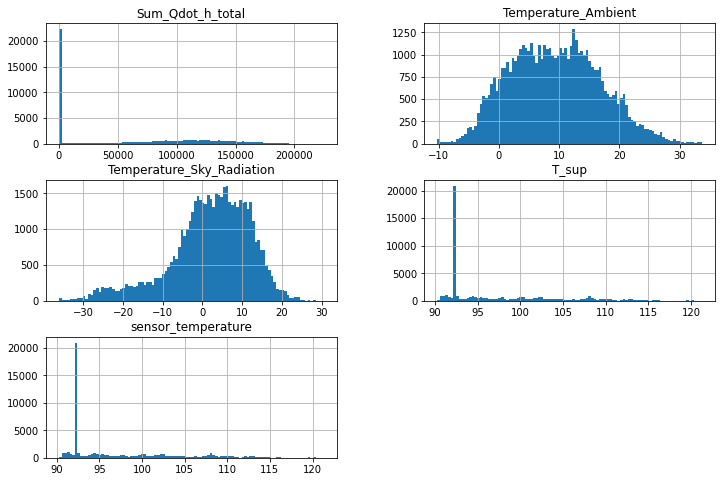

In [ ]:
df[['Sum_Qdot_h_total','Temperature_Ambient','Temperature_Sky_Radiation','T_sup','sensor_temperature']].hist(stacked=False, bins=100, figsize=(12,8));

In [ ]:
import numpy as np
import math
df["x_norm"] = 2 * math.pi * df["Time"] / df["Time"].max()
df1["x_norm"] = 2 * math.pi * df1["Time"] / df1["Time"].max()
df["cos_x"] = np.cos(df["x_norm"])
df1["cos_x"]= np.cos(df["x_norm"])
#df[df["cos_x"] < 0] = 0
#df1[df1["cos_x"] < 0] = 0
#display(df)
#display(df1)
#import plotly.graph_objects as go

#fig = go.Figure()

#fig.add_trace(go.Scatter(x=df.x_norm, y=df.cos_x))

#fig.update_layout(yaxis = dict(scaleanchor = "x", scaleratio = 1))

#fig.show()
#plt.plot(df["Time",df["cos_x"]])

In [ ]:
df.loc[40752:41616]

,Time,sum_Qdot_HIL3,sum_Qdot_HIL2,sum_Qdot_HIL1,T_out_Boiler,Qdot_Storage_out,Qdot_boiler,Sum_Qdot_h_total,T_ret,T_sup,...,Solar_Radiation_beam_normal,Solar_Radiation_diffuse_horizontal,Solar_Radiation_diffuse_surface,Solar_Radiation_direct_surface,Station_Pressure,Temperature_Sky_Radiation,Wind_Direction,Wind_Speed,Zenith_Angle,Temperature_Ambient
40752,24451200,14020.167910,13649.913690,56021.71797,91.726427,98097.04089,117741.72920,83691.79957,68.093320,91.243933,...,0.0,0.0,0.0,0.0,98160.00000,5.300000,210.000000,1.000000,135.380,9.200000
40753,24451800,14058.093610,13688.928260,56177.66538,91.852915,101203.47010,118415.92520,83924.68725,67.759031,91.295567,...,0.0,0.0,0.0,0.0,98166.66667,5.266667,206.666667,0.833333,135.180,9.166667
40754,24452400,14096.019320,13727.942830,56333.61280,91.910825,101859.09040,118866.57220,84157.57495,67.716271,91.361198,...,0.0,0.0,0.0,0.0,98173.33333,5.233333,203.333333,0.666667,134.980,9.133333
40755,24453000,14133.945030,13766.957400,56489.56023,91.916591,102090.83640,119047.90280,84390.46266,67.714644,91.411587,...,0.0,0.0,0.0,0.0,98180.00000,5.200000,200.000000,0.500000,134.780,9.100000
40756,24453600,14171.870750,13805.971980,56645.50767,91.906170,102233.03630,119139.45090,84623.35040,67.713010,91.441215,...,0.0,0.0,0.0,0.0,98186.66667,5.166667,196.666667,0.333333,134.580,9.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41612,24967200,9860.638586,9099.224623,39632.73774,91.560041,76626.64647,98395.01911,58592.60095,70.315242,91.094576,...,0.0,0.0,0.0,0.0,98416.66667,10.700000,210.000000,4.000000,136.170,12.500000
41613,24967800,9803.992174,9040.855492,39399.27635,91.574714,76272.44500,98043.61260,58244.12402,70.367300,91.105306,...,0.0,0.0,0.0,0.0,98405.00000,10.750000,210.000000,4.000000,136.535,12.550000
41614,24968400,9747.345765,8982.486364,39165.81497,91.592001,75942.89108,97715.36250,57895.64710,70.417191,91.118081,...,0.0,0.0,0.0,0.0,98393.33333,10.800000,210.000000,4.000000,136.900,12.600000
41615,24969000,9690.699360,8924.117238,38932.35359,91.607461,75612.71752,97386.30842,57547.17019,70.467848,91.132063,...,0.0,0.0,0.0,0.0,98381.66667,10.850000,210.000000,4.000000,137.265,12.650000


In [ ]:
plt.plot(df["Time"]/86400,df1["cos_x"])

KeyError: ignored

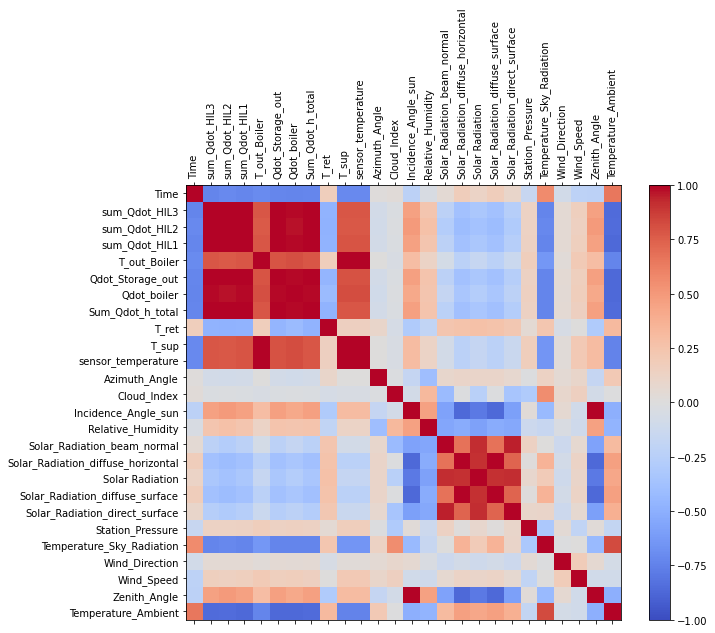

In [ ]:
import numpy as np
corr=df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [ ]:
df['T_sup'].corr(df['Temperature_Sky_Radiation'])

-0.6417155271983161

In [ ]:
df.corr(method='pearson', min_periods=1)

,Time,sum_Qdot_HIL3,sum_Qdot_HIL2,sum_Qdot_HIL1,T_out_Boiler,Qdot_Storage_out,Qdot_boiler,Sum_Qdot_h_total,T_ret,T_sup,...,Solar_Radiation_diffuse_horizontal,Solar Radiation,Solar_Radiation_diffuse_surface,Solar_Radiation_direct_surface,Station_Pressure,Temperature_Sky_Radiation,Wind_Direction,Wind_Speed,Zenith_Angle,Temperature_Ambient
Time,1.000000,-0.728396,-0.708508,-0.723887,-0.699604,-0.726031,-0.731061,-0.722753,0.168438,-0.705199,...,0.171894,0.121551,0.171894,0.094196,-0.151329,0.564485,-0.079776,-0.215691,-0.222122,0.651306
sum_Qdot_HIL3,-0.728396,1.000000,0.994446,0.999712,0.781547,0.999276,0.987274,0.999730,-0.475631,0.789061,...,-0.372284,-0.324161,-0.372284,-0.262745,0.132471,-0.728262,0.053880,0.159393,0.458982,-0.858471
sum_Qdot_HIL2,-0.708508,0.994446,1.000000,0.994117,0.767811,0.994947,0.975059,0.995942,-0.476788,0.774956,...,-0.401451,-0.364096,-0.401451,-0.290083,0.128553,-0.714014,0.052441,0.142349,0.494589,-0.848047
sum_Qdot_HIL1,-0.723887,0.999712,0.994117,1.000000,0.783554,0.999452,0.987746,0.999821,-0.472536,0.790952,...,-0.372286,-0.323353,-0.372286,-0.262123,0.134085,-0.731261,0.052853,0.157120,0.459410,-0.860207
T_out_Boiler,-0.699604,0.781547,0.767811,0.783554,1.000000,0.791445,0.809826,0.781313,0.168221,0.998287,...,-0.226863,-0.160172,-0.226863,-0.131702,0.169749,-0.640581,0.025347,0.200223,0.291706,-0.732468
Qdot_Storage_out,-0.726031,0.999276,0.994947,0.999452,0.791445,1.000000,0.988847,0.999515,-0.460133,0.798403,...,-0.373742,-0.325594,-0.373742,-0.263274,0.135132,-0.730591,0.052167,0.157316,0.461475,-0.860644
Qdot_boiler,-0.731061,0.987274,0.975059,0.987746,0.809826,0.988847,1.000000,0.986425,-0.419464,0.815597,...,-0.332212,-0.272134,-0.332212,-0.222334,0.140929,-0.731596,0.046374,0.169858,0.415774,-0.864186
Sum_Qdot_h_total,-0.722753,0.999730,0.995942,0.999821,0.781313,0.999515,0.986425,1.000000,-0.474134,0.788695,...,-0.377311,-0.330348,-0.377311,-0.266968,0.133028,-0.728566,0.053003,0.155242,0.465408,-0.858654
T_ret,0.168438,-0.475631,-0.476788,-0.472536,0.168221,-0.460133,-0.419464,-0.474134,1.000000,0.154831,...,0.257412,0.268763,0.257412,0.219126,0.052274,0.230265,-0.051722,0.003341,-0.292973,0.318462
T_sup,-0.705199,0.789061,0.774956,0.790952,0.998287,0.798403,0.815597,0.788695,0.154831,1.000000,...,-0.231447,-0.164875,-0.231447,-0.135462,0.167452,-0.641716,0.028126,0.203157,0.296997,-0.737137


<function matplotlib.pyplot.show(*args, **kw)>

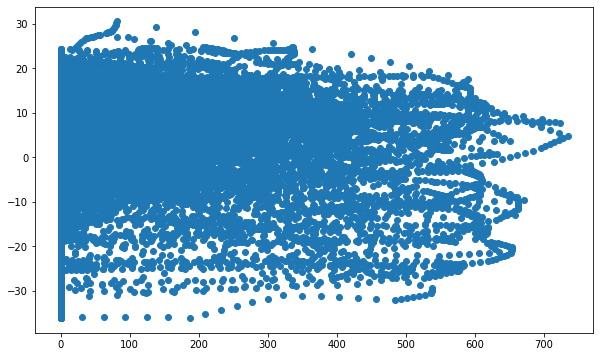

In [ ]:
fig=plt.figure(figsize=(10,6))
plt.scatter(df['Solar_Radiation_beam_normal'],df['Temperature_Sky_Radiation'])
plt.show

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52561 entries, 0 to 52560
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Time                                52561 non-null  int64  
 1   sum_Qdot_HIL3                       52561 non-null  float64
 2   sum_Qdot_HIL2                       52561 non-null  float64
 3   sum_Qdot_HIL1                       52561 non-null  float64
 4   T_out_Boiler                        52561 non-null  float64
 5   Qdot_Storage_out                    52561 non-null  float64
 6   Qdot_boiler                         52561 non-null  float64
 7   Sum_Qdot_h_total                    52561 non-null  float64
 8   T_ret                               52561 non-null  float64
 9   T_sup                               52561 non-null  float64
 10  sensor_temperature                  52561 non-null  float64
 11  Azimuth_Angle                       52561

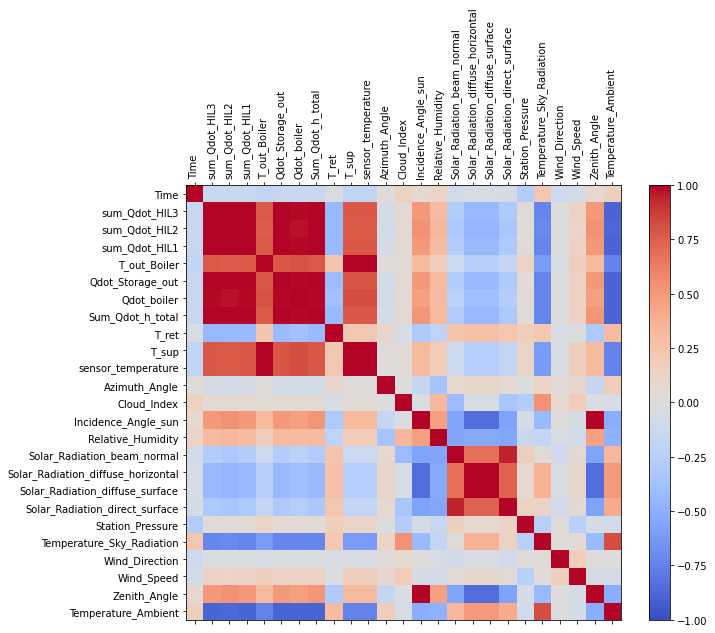

In [ ]:
import numpy as np
corr=df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [6]:
df_input=df[['Qdot_Storage_out','sensor_temperature','Solar_Radiation_diffuse_horizontal',
             'Sum_Qdot_h_total']]
df1_input=df1[['Qdot_Storage_out','sensor_temperature','Solar_Radiation_diffuse_horizontal',
             'Sum_Qdot_h_total']]

In [5]:
df_input

NameError: ignored

In [18]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(df_input)
data_scaled_test=scaler.fit_transform(df_input.loc[2016:6624])
data_scaled

array([[0.        , 0.31553774, 0.        , 0.77405388],
       [0.65609009, 0.39815935, 0.        , 0.77405476],
       [0.83390089, 0.48147274, 0.        , 0.77405564],
       ...,
       [0.7434975 , 0.65908889, 0.        , 0.72429485],
       [0.74762486, 0.65882251, 0.        , 0.72897246],
       [0.73001742, 0.65795178, 0.        , 0.72145413]])

In [19]:
features=data_scaled
target=data_scaled[:,0]
features_test=data_scaled_test
target_test=data_scaled_test[:,0]

In [20]:
tf.keras.preprocessing.sequence.TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.        , 0.31553774, 0.        , 0.77405388],
         [0.65609009, 0.39815935, 0.        , 0.77405476]]]),
 array([0.83390089]))

In [21]:
#x_train, y_train = train_test_split(features, target)
X_test,Y_test=(features_test, target_test)
x_train, y_train=(features, target)
#x_train, x_test, y_train, y_test=train_test_split(features, target, test_size=0.001, random_state=123, shuffle=False)

In [22]:
X_test.shape

(4609, 4)

In [23]:
Y_test.shape

(4609,)

In [26]:
win_length=144
batch_size=32
num_features=4
train_generator=tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator=tf.keras.preprocessing.sequence.TimeseriesGenerator(X_test, Y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [27]:
train_generator[0]

(array([[[0.        , 0.31553774, 0.        , 0.77405388],
         [0.65609009, 0.39815935, 0.        , 0.77405476],
         [0.83390089, 0.48147274, 0.        , 0.77405564],
         ...,
         [0.63505477, 0.58650023, 0.        , 0.60359065],
         [0.6341496 , 0.58663009, 0.        , 0.60255223],
         [0.63323409, 0.58677003, 0.        , 0.60151381]],
 
        [[0.65609009, 0.39815935, 0.        , 0.77405476],
         [0.83390089, 0.48147274, 0.        , 0.77405564],
         [0.81860303, 0.51806003, 0.        , 0.77405651],
         ...,
         [0.6341496 , 0.58663009, 0.        , 0.60255223],
         [0.63323409, 0.58677003, 0.        , 0.60151381],
         [0.63851335, 0.58749397, 0.        , 0.60150326]],
 
        [[0.83390089, 0.48147274, 0.        , 0.77405564],
         [0.81860303, 0.51806003, 0.        , 0.77405651],
         [0.79731962, 0.52670073, 0.        , 0.77405739],
         ...,
         [0.63323409, 0.58677003, 0.        , 0.60151381],
        

In [28]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=128, input_shape=(win_length, num_features), return_sequences=True,kernel_regularizer=tf.keras.regularizers.L2(l2=1e-05)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(units=64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.L2(l2=1e-05)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(units=64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.L2(l2=1e-05)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(units=64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.L2(l2=1e-05)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(units=64, return_sequences=False))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 144, 128)          68096     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 144, 128)          0         
                                                                 
 lstm_6 (LSTM)               (None, 144, 64)           49408     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 144, 64)           0         
                                                                 
 dropout_4 (Dropout)         (None, 144, 64)           0         
                                                                 
 lstm_7 (LSTM)               (None, 144, 64)           33024     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 144, 64)          

In [30]:
#early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,mode='min')
model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(learning_rate=1e-4),
              metrics=[tf.metrics.MeanAbsoluteError()])

history=model.fit_generator(train_generator, epochs=20,
                            validation_data=test_generator,
                            shuffle=False)
                            #callbacks=[early_stopping])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


1639/1639 [==============================] - 66s 33ms/step - loss: 0.0155 - mean_absolute_error: 0.0667 - val_loss: 0.0197 - val_mean_absolute_error: 0.1083
Epoch 2/20
1639/1639 [==============================] - 52s 32ms/step - loss: 0.0081 - mean_absolute_error: 0.0497 - val_loss: 0.0145 - val_mean_absolute_error: 0.0923
Epoch 3/20
1639/1639 [==============================] - 51s 31ms/step - loss: 0.0064 - mean_absolute_error: 0.0438 - val_loss: 0.0129 - val_mean_absolute_error: 0.0886
Epoch 4/20
1639/1639 [==============================] - 51s 31ms/step - loss: 0.0054 - mean_absolute_error: 0.0404 - val_loss: 0.0106 - val_mean_absolute_error: 0.0797
Epoch 5/20
1639/1639 [==============================] - 52s 31ms/step - loss: 0.0045 - mean_absolute_error: 0.0371 - val_loss: 0.0087 - val_mean_absolute_error: 0.0720
Epoch 6/20
1639/1639 [==============================] - 51s 31ms/step - loss: 0.0038 - mean_absolute_error: 0.0343 - val_loss: 0.0065 - val_mean_absolute_error: 0.0599
Epo

In [31]:
model.evaluate(test_generator, verbose=0)

[0.0024611810222268105, 0.036227647215127945]

In [32]:
predictions=model.predict(test_generator)

140/140 [==============================] - 3s 14ms/step


In [33]:
predictions

array([[0.7104903 ],
       [0.71092224],
       [0.70866483],
       ...,
       [0.5534919 ],
       [0.5547806 ],
       [0.5575446 ]], dtype=float32)

In [34]:
predictions.shape[0]

4465

In [35]:
Y_test.shape

(4609,)

In [36]:
X_test.shape

(4609, 4)

In [37]:
X_test[:,1:][win_length:]

array([[0.85154654, 0.        , 0.72455329],
       [0.82387845, 0.        , 0.71932411],
       [0.79531517, 0.        , 0.71409494],
       ...,
       [0.34968407, 0.        , 0.57184544],
       [0.34949544, 0.        , 0.57823692],
       [0.34854007, 0.        , 0.59222451]])

In [38]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(X_test[:,1:][win_length:])],axis=1)
df_pred

,0,0,1,2
0,0.710490,0.851547,0.0,0.724553
1,0.710922,0.823878,0.0,0.719324
2,0.708665,0.795315,0.0,0.714095
3,0.702184,0.777466,0.0,0.708866
4,0.692239,0.767089,0.0,0.703637
...,...,...,...,...
4460,0.550426,0.350112,0.0,0.559062
4461,0.552468,0.349869,0.0,0.565454
4462,0.553492,0.349684,0.0,0.571845
4463,0.554781,0.349495,0.0,0.578237


In [39]:
rev_trans=scaler.inverse_transform(df_pred)

In [40]:
rev_trans

array([[1.87913654e+05, 1.17024811e+02, 0.00000000e+00, 1.68645549e+05],
       [1.88000140e+05, 1.16235090e+02, 0.00000000e+00, 1.67599180e+05],
       [1.87548159e+05, 1.15419818e+02, 0.00000000e+00, 1.66552811e+05],
       ...,
       [1.56479184e+05, 1.02700316e+02, 0.00000000e+00, 1.38088377e+05],
       [1.56737212e+05, 1.02694932e+02, 0.00000000e+00, 1.39367326e+05],
       [1.57290621e+05, 1.02667664e+02, 0.00000000e+00, 1.42166274e+05]])

In [41]:
df_final=df1_input[2016:6481]

In [42]:
df_final.count()

Qdot_Storage_out                      4465
sensor_temperature                    4465
Solar_Radiation_diffuse_horizontal    4465
Sum_Qdot_h_total                      4465
dtype: int64

In [43]:
df_final['Qdot_pred']=rev_trans[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_final

,Qdot_Storage_out,sensor_temperature,Solar_Radiation_diffuse_horizontal,Sum_Qdot_h_total,Qdot_pred
2016,230831.6594,105.845390,0.0,191916.3902,187913.653648
2017,218979.3216,106.802728,0.0,192149.0582,188000.140341
2018,220930.9889,108.253711,0.0,192381.7262,187548.158757
2019,219905.4376,109.334871,0.0,192614.3941,186250.548068
2020,218631.0749,110.133478,0.0,192847.0620,184259.253711
...,...,...,...,...,...
6476,161879.7990,113.337879,0.0,139722.1045,155865.422832
6477,161772.2688,113.336512,0.0,139605.7531,156274.178970
6478,161667.7639,113.336613,0.0,139489.4017,156479.183582
6479,161560.0018,113.337628,0.0,139373.0503,156737.211566


In [45]:
df_final[['Qdot_Storage_out','Qdot_pred']]

,Qdot_Storage_out,Qdot_pred
2016,230831.6594,187913.653648
2017,218979.3216,188000.140341
2018,220930.9889,187548.158757
2019,219905.4376,186250.548068
2020,218631.0749,184259.253711
...,...,...
6476,161879.7990,155865.422832
6477,161772.2688,156274.178970
6478,161667.7639,156479.183582
6479,161560.0018,156737.211566


In [ ]:
a=df_final['Qdot_pred'].to_numpy()

In [ ]:
b=df_final['Qdot_Storage_out'].to_numpy()

In [ ]:
import numpy as np
rmse=np.sqrt(np.mean(df_final['Qdot_Storage_out']-df_final['Qdot_pred'])**2)
rmse

1545.7454839134073

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mape=mean_absolute_error(df_final['Qdot_pred'], df_final['Qdot_Storage_out'])
rmse=sqrt(mean_squared_error(df_final['Qdot_pred'], df_final['Qdot_Storage_out']))
rmse

40402.05685218554

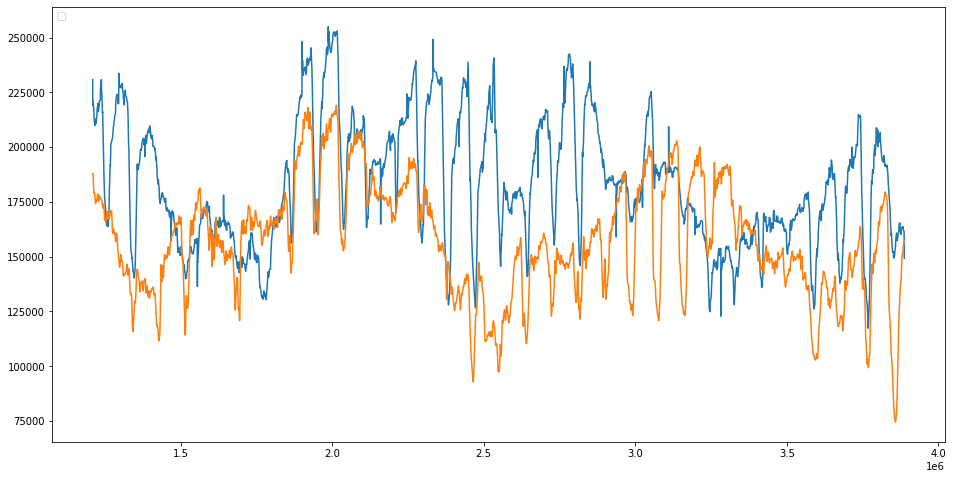

In [47]:
fig=plt.figure(figsize=(16,8))
plt.rcParams["figure.autolayout"] = True
x=df1['Time'].loc[2016:6480]
y=df_final['Qdot_Storage_out']
y1=df_final['Qdot_pred']
plt.legend(loc="upper left")
plt.plot(x,y,label='Actual Qdot')
plt.plot(x,y1,label='LSTM Model Predictions')
plt.show()

In [ ]:
df_final[['Qdot_Storage_out','Qdot_pred']].plot()